# Quantum Circuit Implementation using Qiskit


* **Author**: yeray142 (Yeray C.)
* **Date**: 2023/09/30
* **Updated**: 2023/11/01
* **Version**: 2.1
* **Description**: This notebook explores the implementation of a custom quantum circuit using the Qiskit library for Quantum Machine Learning (Quantum ML). Qiskit, developed by IBM, is an open-source quantum computing framework that enables the creation, manipulation, and simulation of quantum circuits.

This Jupyter Notebook demonstrates the implementation of a custom quantum circuit using the Qiskit library for Quantum Machine Learning (Quantum ML). Qiskit is an open-source quantum computing framework developed by IBM, which allows users to create, manipulate, and simulate quantum circuits.

In this notebook, we will explore the fundamentals of quantum circuits, including qubits, gates, and measurements, and create a custom quantum circuit for a specific task. Quantum computing has the potential to revolutionize various fields, and this notebook serves as a practical introduction to working with quantum circuits using Qiskit.

**Table of Contents:**

1. [Setup](#setup)
2. [Quantum Circuits Basics](#quantum-circuits-basics)
3. [Custom Quantum Circuit](#custom-quantum-circuit)
4. [Custom Feature Map](#custom-feature-map)
5. [Graph encoding circuit](#graph-encoding-circuit)
5. [Conclusions](#conclusions)

Let's get started by setting up our environment and exploring the basics of quantum circuits.

## Setup

Before we dive into creating custom quantum circuits with Qiskit, it's important to ensure that you have the necessary libraries and components installed. This section will cover the setup and installation process.

In the first code cell, we import the required libraries:


In [1]:
from qiskit.circuit import Parameter, ParameterVector
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

## Quantum Circuits Basics

In this section, we will explore the fundamental components and operations of quantum circuits using Qiskit. We'll create a simple quantum circuit and visualize it using Matplotlib.

The following Python code cell demonstrates the creation of a basic quantum circuit.

Here's a breakdown of what this code does:

* We define symbolic parameters inputs and x using ParameterVector. These parameters will be used in our quantum circuit.
* We create a QuantumCircuit object qc with 2 quantum bits (qubits).
* We apply a Hadamard gate (_qc.h_) to both qubits (qubits 0 and 1).
* Next, we apply single-qubit rotation gates (_qc.rz_) to qubits 0 and 1, controlled by the symbolic parameters x[0] and x[1], respectively.
* We apply a CNOT gate (_qc.cnot_ or _qc.cx_) between qubits 0 and 1.
* Finally, we apply another single-qubit rotation gate to qubit 1, controlled by the product of x[0] and x[1].
* To visualize this quantum circuit, we use _qc.draw("mpl")_, which generates a Matplotlib plot of the circuit.

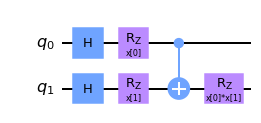

In [2]:
inputs = ParameterVector("input", 2)
x = ParameterVector("x", 4)

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.rz(x[0], 0)
qc.rz(x[1], 1)
qc.cnot(0, 1) # Same as qc.cx(0, 1)
qc.rz(x[0] * x[1], 1)
qc.draw("mpl")

## Custom Quantum Circuit

In this section, we define a custom quantum circuit function and create a quantum circuit instance using Qiskit. The custom quantum circuit is created with the goal of demonstrating how to use symbolic parameters effectively in quantum circuits.

The following Python code cell defines the custom quantum circuit function and generates a visualization of the circuit:


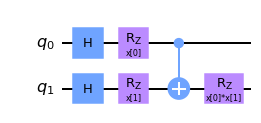

In [3]:
def q_circuit(params):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.h(1)
    qc.rz(params[0], 0)
    qc.rz(params[1], 1)
    qc.cnot(0, 1) # Same as qc.cx(0, 1)
    qc.rz(params[0] * params[1], 1)
    return qc

x = ParameterVector("x", 4)
circuit = q_circuit(x)
circuit.draw("mpl")

## Custom Feature Map

In this section, we define a custom feature map for Quantum Machine Learning using Qiskit. A feature map is a crucial component in quantum machine learning algorithms such as quantum variational classifier (QVM). It maps classical data into a quantum state. This custom feature map can be integrated into various quantum machine learning algorithms to process classical data into a quantum state.

The following Python code cell defines the custom feature map function and its usage:

In [4]:
def custom_q_circuit(num_qubits, reps, params):
    qc = QuantumCircuit(num_qubits)

    # Apply the specified number of repetitions
    for qubit in range(num_qubits):
            qc.h(qubit)

    for _ in range(reps):
        for qubit in range(num_qubits):
            qc.rz(params[qubit], qubit)

        for qubit in range(1, num_qubits):
            for prev in range(qubit):
                qc.cnot(prev, qubit)
                qc.rz(params[prev] * params[qubit], qubit)

        qc.barrier()

    return qc

Now, let's visualize the custom feature map we defined earlier using specific parameters. The feature map is designed to transform classical data into a quantum state suitable for quantum machine learning tasks.

You can adjust the parameters in param_vector to explore different quantum states produced by the custom feature map. This concludes our exploration of custom quantum circuits and feature maps using Qiskit for quantum machine learning. In the "Conclusion" section, you can summarize your findings and insights.

The following Python code cell sets the parameters and generates a visualization of the custom feature map circuit:


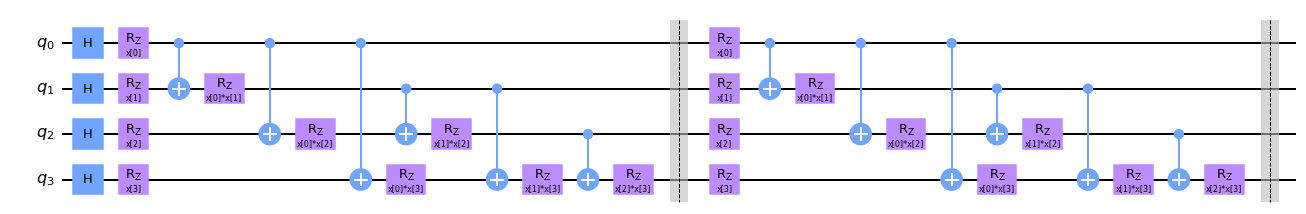

In [5]:
num_qubits = 4
reps = 2
param_vector = ParameterVector("x", num_qubits)  # Modify this list with your parameters
circuit = custom_q_circuit(num_qubits, reps, param_vector)

# Draw the circuit
circuit.draw("mpl", fold=27)

## Graph encoding circuit

This code defines a function called 'graph_encoding_circuit' that generates a quantum circuit for encoding a graph. The circuit applies Hadamard gates to all qubits and then performs edge and vertex encoding. The number of qubits, repetitions, edges, and parameters are provided as inputs to the function.

The function takes in a list of edges, the number of qubits, the number of repetitions, and a list of parameter symbols. It creates a quantum circuit and applies Hadamard gates to all qubits. Then, for each repetition, it performs edge encoding by applying CNOT and RZ gates to the qubits corresponding to the edges. After that, it applies a barrier and performs vertex encoding by applying RX gates to each qubit.

The final circuit is returned by the function.

The code also includes an example usage of the 'graph_encoding_circuit' function, where a list of edges, number of qubits, number of repetitions, and parameter symbols are provided. The function is called with these inputs and the resulting circuit is drawn using the 'draw' method.

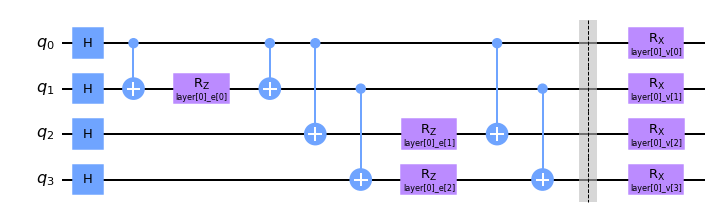

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

def graph_encoding_circuit(edges, num_qubits, reps, params):
    # Create a quantum circuit
    circuit = QuantumCircuit(num_qubits)

    # Apply Hadamard gates to all qubits
    circuit.h(range(num_qubits))

    for rep in range(reps):
        edge_w = params[rep][-1]

        # Edge encoding
        for edge_i, edge in enumerate(edges):
            circuit.cnot(edge[0], edge[1])

            circuit.rz(edge_w[edge_i], edge[1])

            circuit.cnot(edge[0], edge[1])

        # This barrier is just to improve visualization, it can be removed
        circuit.barrier()

        # Vertex encoding
        for q in range(num_qubits):
            circuit.rx(params[rep][q], q)

    return circuit

n_qubits = 4
reps = 1
edges = [(0, 1), (0, 2), (1, 3)] # Hardcoded edges for testing.
n_edges = len(edges)

data_symbols = []
for layer in range(reps):
    data = [Parameter(f'layer[{layer}]_v[{qubit}]') for qubit in range(n_qubits)]
    data += [[Parameter(f'layer[{layer}]_e[{ew}]') for ew in range(n_edges)]]
    data_symbols.append(data)

my_circuit = graph_encoding_circuit(edges, n_qubits, reps, data_symbols)
my_circuit.draw("mpl", fold=50)


## Conclusions

In this notebook, we embarked on a journey to explore quantum circuits and their application in Quantum Machine Learning (Quantum ML) using the Qiskit library. We covered several essential concepts and implemented custom quantum circuits to gain a deeper understanding of quantum operations and their role in Quantum ML.

Throughout this notebook, we've laid the foundation for further exploration of Quantum ML and quantum computing. Quantum circuits offer a unique approach to data processing and solving complex problems, and Qiskit provides a powerful toolkit to harness their potential.

As you continue your journey into the world of quantum computing and Quantum ML, remember that this notebook serves as a starting point. Feel free to experiment with different quantum circuits, parameters, and applications to unlock the full potential of quantum technology.
